<a href="https://colab.research.google.com/github/joaoaxerb/Data-Science/blob/master/Copy_of_%5BTemplate%5D_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="70%" src="https://github.com/joaoaxerb/Data-Science/raw/master/banner.png">

#### **Data Science na Prática 2.0**
*by João Filipe Axer batista*

---

# Análise dos Dados do Airbnb - *Tokyo*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Tokyo, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados
Todos os dados foram obtidos através do site [Inside Airbnb](http://insideairbnb.com/index.html).

para análise inicial exploratória, foi baixado apenas o seguinte arquivo:

* *listing.csv* - *Summary information and metric for listing in Tokyo (Good for visualization).*


In [3]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/japan/kant%C5%8D/tokyo/2020-04-28/visualisations/listings.csv')


## Análise dos Dados
Esta etapa tem como objetivo, dar uma visão geral dos dados e como os mesmos estão estruturados.


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [5]:
# mostrar as 5 primeiras entradas
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,35303,"La Casa Gaienmae C Harajuku, Omotesando is nearby",151977,Miyuki,NaN,Shibuya Ku,35.67152,139.71203,Private room,4183,28,18,2018-07-28,0.18,3,89
1,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,NaN,Sumida Ku,35.71721,139.82596,Entire home/apt,11048,3,165,2020-03-04,1.57,1,271
2,289597,Private apt in central Tokyo #203,341577,Hide&Kei,NaN,Nerima Ku,35.74267,139.65810,Entire home/apt,4171,28,113,2020-02-17,1.18,2,241
3,370759,"Cozy flat #203, local area YET 10 mins to shib...",1573631,"Gilles,Mayumi,Taiki",NaN,Setagaya Ku,35.66443,139.65707,Entire home/apt,6952,28,103,2020-04-16,1.39,3,364
4,700253,Private apt in central Tokyo #201,341577,Hide&Kei,NaN,Nerima Ku,35.74264,139.65832,Entire home/apt,3957,28,103,2019-10-04,1.12,2,340


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com 35847 entradas e 106 variáveis (`listings.csv.gz`).

In [0]:
# identificar o volume de dados do DataFrame
print('Entradas:\t {}'.format(df.shape[0]))
print('Variaveis:\t {}\n'.format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)


Entradas:	 15352
Variaveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em poucas linhas.


In [0]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)


neighbourhood_group               1.000000
reviews_per_month                 0.170010
last_review                       0.170010
host_name                         0.000717
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição de variáveis, irei plotar o histograma.

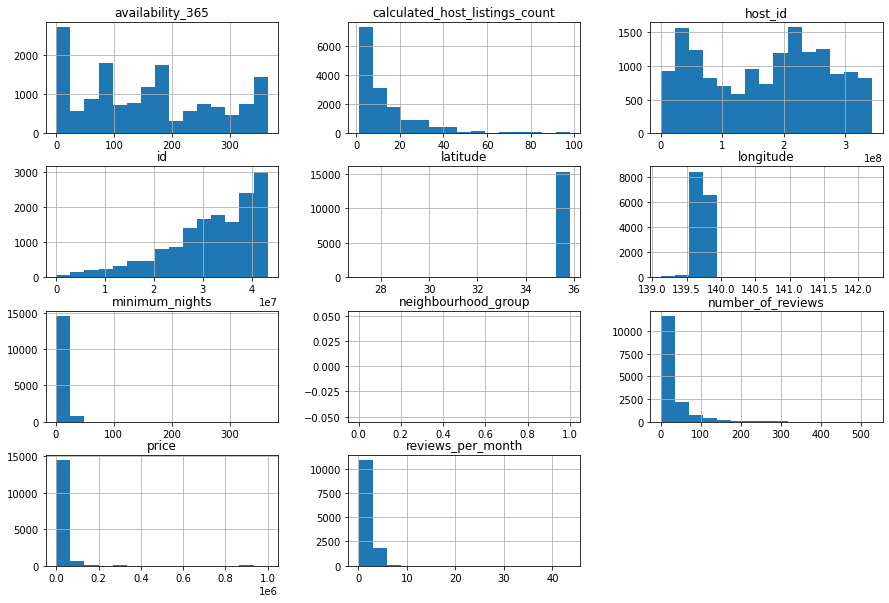

In [0]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

###**Q4. Há *Outliers* presentes?**###

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [0]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count','availability_365',]].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.535200e+04,15352.000000,15352.000000,12742.000000,15352.000000,15352.000000
mean,2.624158e+04,3.293968,26.542731,1.695281,13.434732,155.732348
std,7.636344e+04,9.114849,40.566386,1.365650,15.399161,115.567651
min,0.000000e+00,1.000000,0.000000,0.020000,1.000000,0.000000
25%,6.952000e+03,1.000000,2.000000,0.690000,3.000000,63.000000
50%,1.197900e+04,1.000000,11.000000,1.500000,8.000000,150.000000
75%,2.000100e+04,2.000000,34.000000,2.400000,18.000000,247.000000
max,1.000053e+06,365.000000,529.000000,43.600000,98.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 2000, porém seu valor máximo é 10000053.
* A variável `minimum_nights` possui 75% do valor abaixo de 2, porém seu valor máximo é 365.

#### Boxplot para minimum_nights

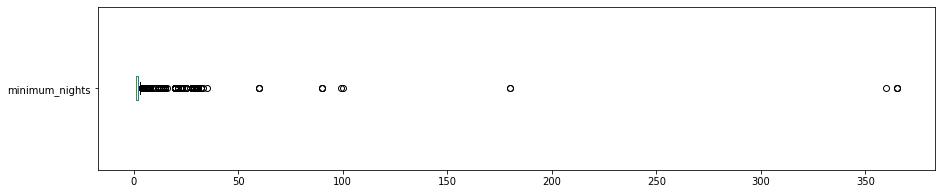

minimum_nights: valores acima de 30:
45 entradas
0.2931%


In [0]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price

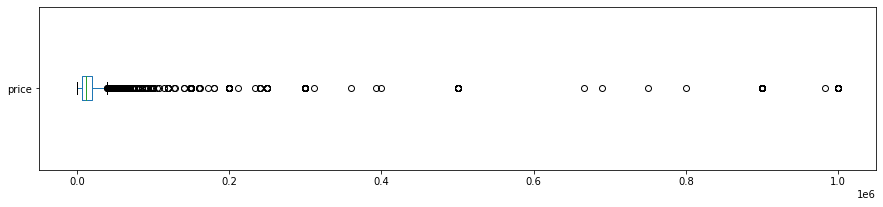


price: valores acima de 50000
986 entradas
6.4226%


In [0]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 50000 para price
print("\nprice: valores acima de 50000")
print("{} entradas".format(len(df[df.price > 50000])))
print("{:.4f}%".format((len(df[df.price > 50000]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

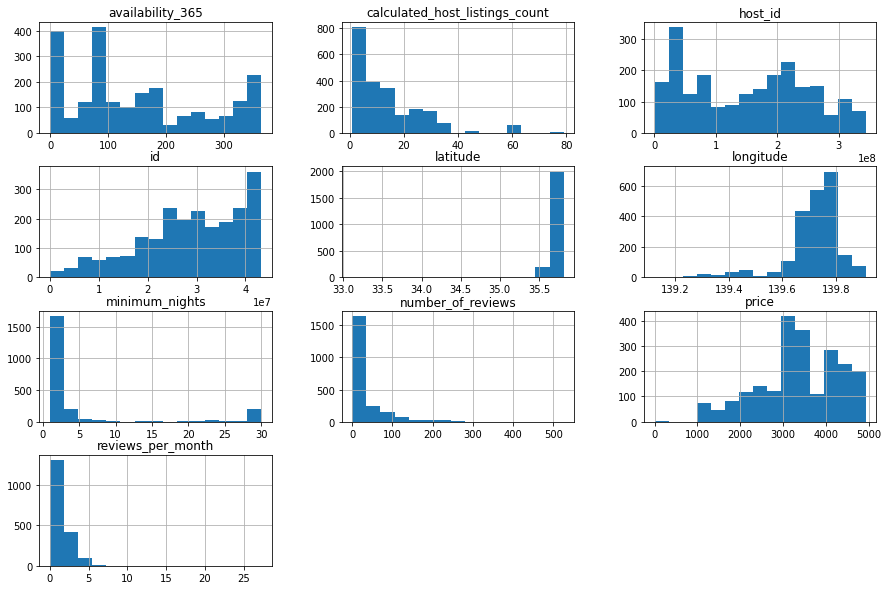

In [6]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 5000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [0]:
# ver a média da coluna `price``
df.price.mean()


26241.576667535173

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [7]:
# criar uma matriz de correlação

corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(df_clean.corr())


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.634373,-0.013480,0.097576,-0.009748,-0.163636,-0.582700,-0.092487,0.141969,-0.034818
host_id,0.634373,1.000000,-0.009614,0.070748,-0.014498,-0.225374,-0.327073,0.037797,0.098235,-0.041393
latitude,-0.013480,-0.009614,1.000000,0.135204,-0.135157,0.054804,-0.001243,-0.017527,0.085966,0.028180
longitude,0.097576,0.070748,0.135204,1.000000,-0.132755,-0.019756,0.007751,0.068191,0.133100,-0.013536
price,-0.009748,-0.014498,-0.135157,-0.132755,1.000000,-0.198915,0.097682,0.063131,-0.283633,0.015622
minimum_nights,-0.163636,-0.225374,0.054804,-0.019756,-0.198915,1.000000,-0.111765,-0.194144,0.319189,0.023679
number_of_reviews,-0.582700,-0.327073,-0.001243,0.007751,0.097682,-0.111765,1.000000,0.768156,-0.231552,0.079318
reviews_per_month,-0.092487,0.037797,-0.017527,0.068191,0.063131,-0.194144,0.768156,1.000000,-0.197812,0.084068
calculated_host_listings_count,0.141969,0.098235,0.085966,0.133100,-0.283633,0.319189,-0.231552,-0.197812,1.000000,0.061911
availability_365,-0.034818,-0.041393,0.028180,-0.013536,0.015622,0.023679,0.079318,0.084068,0.061911,1.000000


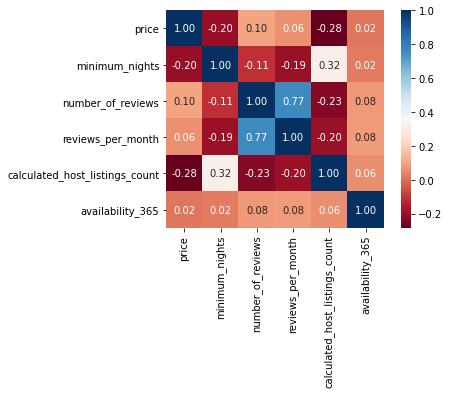

In [8]:
# plotar um heatmap a partir das correlações

sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável room_type indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método value_counts().

In [9]:
# mostrar a quantidade de cada tipo de imóvel disponível

df_clean.room_type.value_counts()


Private room       939
Shared room        533
Entire home/apt    508
Hotel room         217
Name: room_type, dtype: int64

In [13]:
# mostrar a porcentagem de cada tipo de imóvel disponível

df_clean.room_type.value_counts() / df_clean.shape[0]

Private room       0.427401
Shared room        0.242604
Entire home/apt    0.231224
Hotel room         0.098771
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara de Tokyo?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.



In [14]:
# ver preços por bairros, na média

df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]


neighbourhood
Akiruno Shi            4670.333333
Oshima Machi           4505.000000
Koganei Shi            4492.000000
Tama Shi               4406.400000
Hachijo Machi          4362.000000
Setagaya Ku            4268.298507
Chofu Shi              4186.285714
Musashino Shi          4066.500000
Kodaira Shi            4064.600000
Higashimurayama Shi    3972.857143
Name: price, dtype: float64

Acima, vemos que bairros como Akiruno Shi , Oshima Machi   estão com média de preço superior.

Uma pessoa que não conhecesse Tokyo poderia apresentar esses resultados sem se questionar. Só para dar um único exemplo de como uma amostra pode ser não-representativa, veja quantas entradas há para o Akiruno Shi.

In [17]:
# ver quantidade de imóveis no Akiruno Shi
print(df_clean[df_clean.neighbourhood == "Akiruno Shi"].shape)

# ver as 3 entradas do Akiruno Shi
df_clean[df_clean.neighbourhood == "Akiruno Shi"]

(9, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
217,6122133,"NO-1 Mountains,Onsen and Jp-Cuisine in Tokyo!",28596639,Tatsuhiro,Akiruno Shi,35.72939,139.28372,Private room,4920,1,199,2020-02-25,3.28,5,342
306,7430129,LEGALCOURT Hideaways,38919757,Max Masaking,Akiruno Shi,35.72626,139.29516,Entire home/apt,3957,1,24,2020-02-23,0.62,7,0
351,8053973,"NO-3 The mountains,Onsen and Cuisine in Tokyo!",28596639,Tatsuhiro,Akiruno Shi,35.72927,139.28398,Private room,4920,1,75,2019-11-18,1.56,5,254
352,8054021,"NO-2 The mountains,Onsen and Cuisine in Tokyo!",28596639,Tatsuhiro,Akiruno Shi,35.72927,139.28398,Private room,4920,1,148,2020-04-06,2.60,5,350
3685,26271788,LEGALCOURTⅡ Hideaways,38919757,Max Masaking,Akiruno Shi,35.72810,139.29486,Entire home/apt,4492,1,16,2020-03-22,0.79,7,0
7278,32844780,Akigawa JR 160m SEREGA201 Tokyo suburb 2ppl loft,38919757,Max Masaking,Akiruno Shi,35.73061,139.28474,Entire home/apt,4492,2,9,2020-04-14,0.96,7,261
7613,33373279,"NO-4 The mountains,Onsen and Cuisine in Tokyo!",28596639,Tatsuhiro,Akiruno Shi,35.73041,139.28464,Private room,4920,1,5,2019-12-26,0.58,5,339
7714,33496096,"The mountains, Onsen and cuisine in Tokyo !",28596639,Tatsuhiro,Akiruno Shi,35.72815,139.28292,Private room,4920,1,2,2019-11-12,0.29,5,347
10930,38874850,Akigawa JR 160m SEREGA102 Tokyo suburb 2ppl loft,38919757,Max Masaking,Akiruno Shi,35.72878,139.28637,Entire home/apt,4492,1,8,2020-04-24,1.17,7,175


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

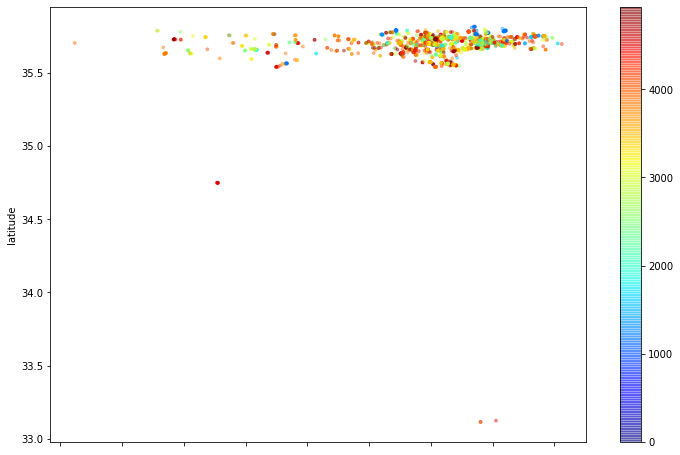

In [15]:
# plotar os imóveis pela latitude-longitude

df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));


### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [16]:
# ver a média da coluna `minimum_nights``

df_clean.minimum_nights.mean()

4.7655894401456536

## Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis